                                         mean         stddev          min  \
case_id                          1.286077e+06  718946.592285        0.000   
MONTH                            2.019363e+05      44.735975   201901.000   
WEEK_NUM                         4.076904e+01      23.797981        0.000   
target                           3.143728e-02       0.174496        0.000   
amtinstpaidbefduel24m_4187115A   5.595833e+04   71614.166354        0.000   
annuity_780A                     4.039207e+03    3006.607629       80.800   
annuitynextmonth_57A             1.435775e+03    2807.021232        0.000   
avginstallast24m_3658937A        5.401588e+03    6531.562344        0.000   
avglnamtstart24m_4525187A        4.471757e+04   44844.786730        0.000   
avgoutstandbalancel6m_4187114A   4.598483e+04   63993.921876 -7588198.500   
avgpmtlast12m_4525200A           6.403573e+03    9248.010195        0.000   
credamount_770A                  4.987016e+04   44183.694010     2000.000   

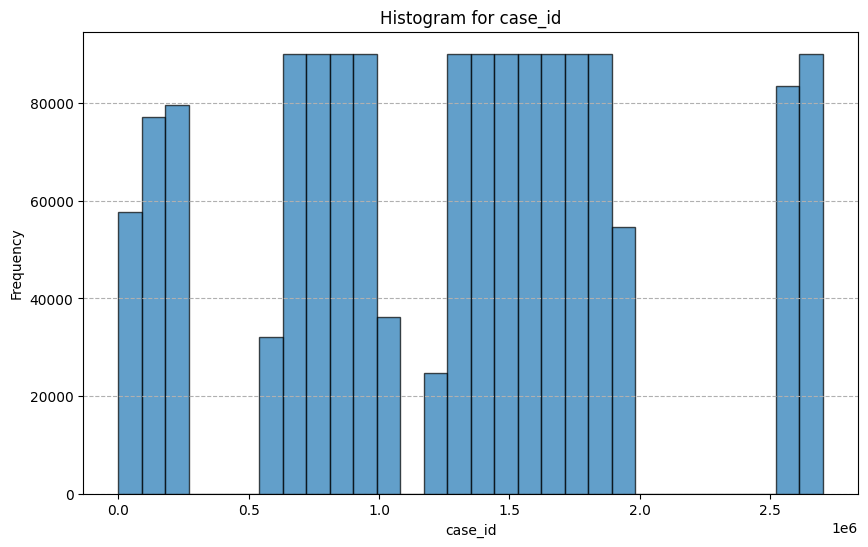

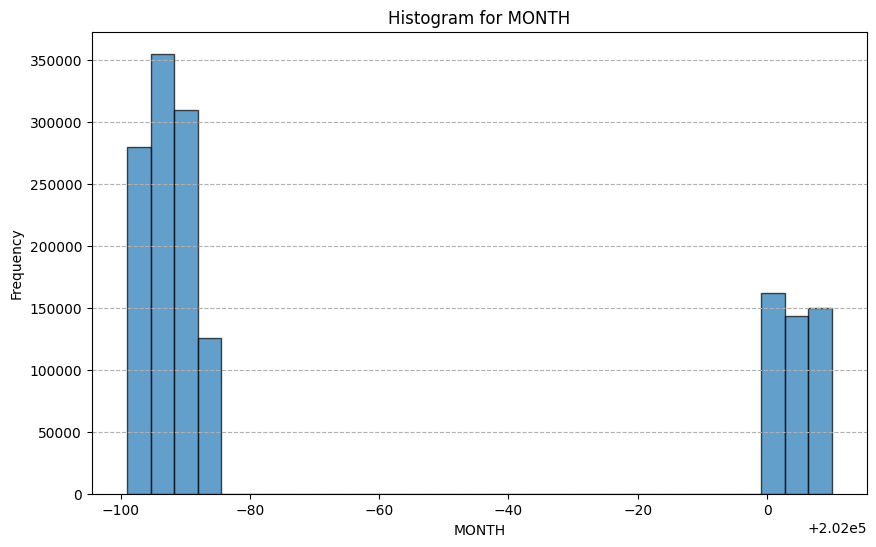

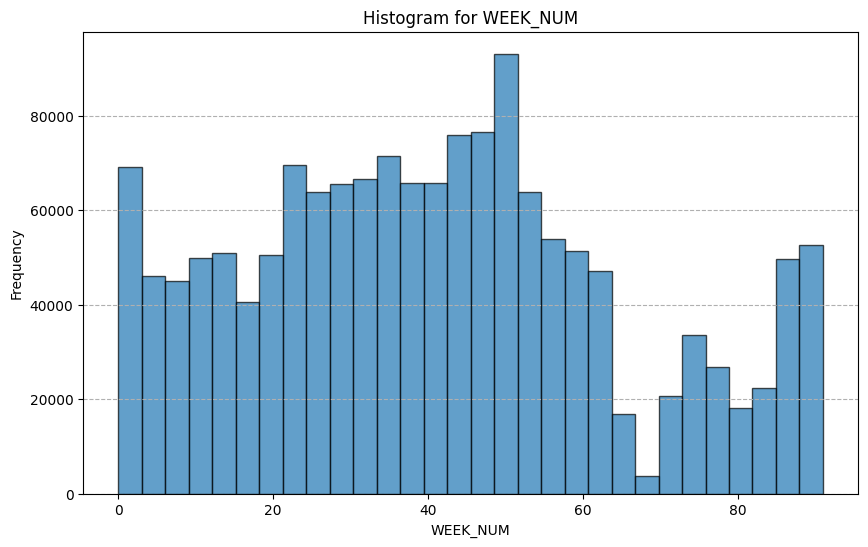

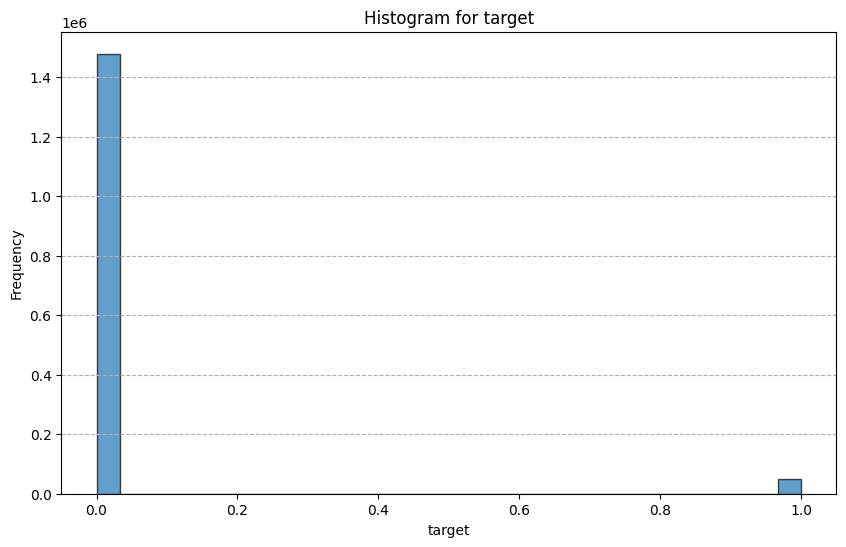

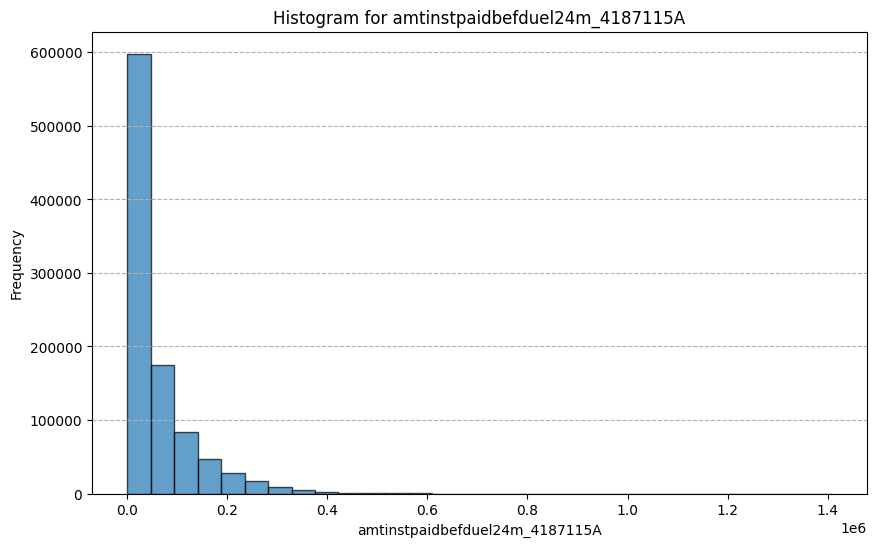

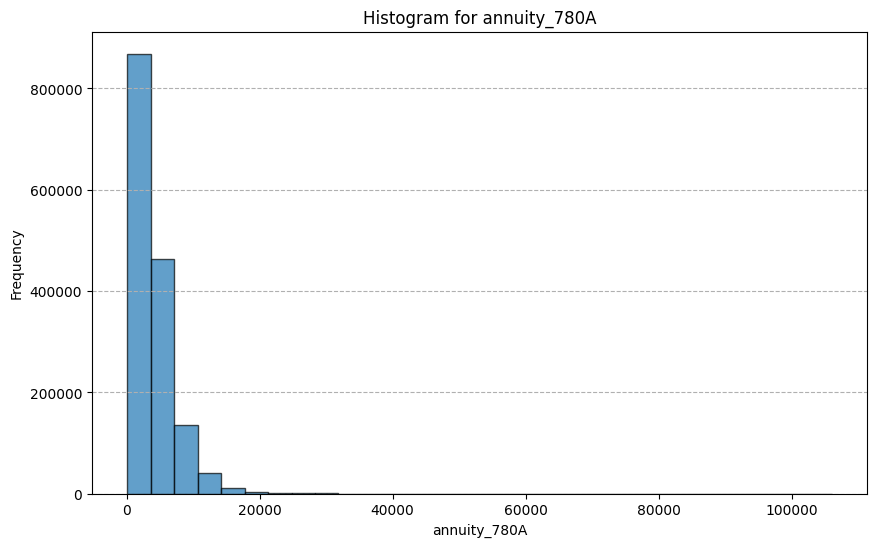

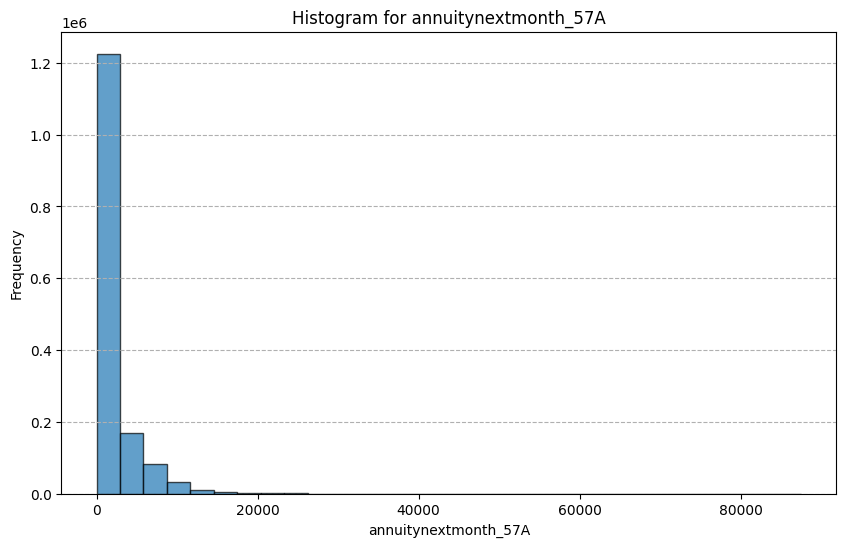

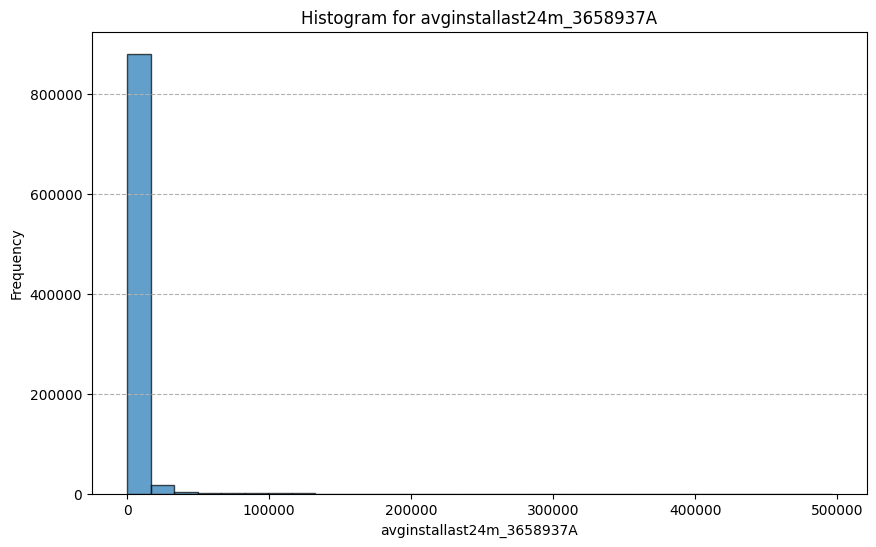

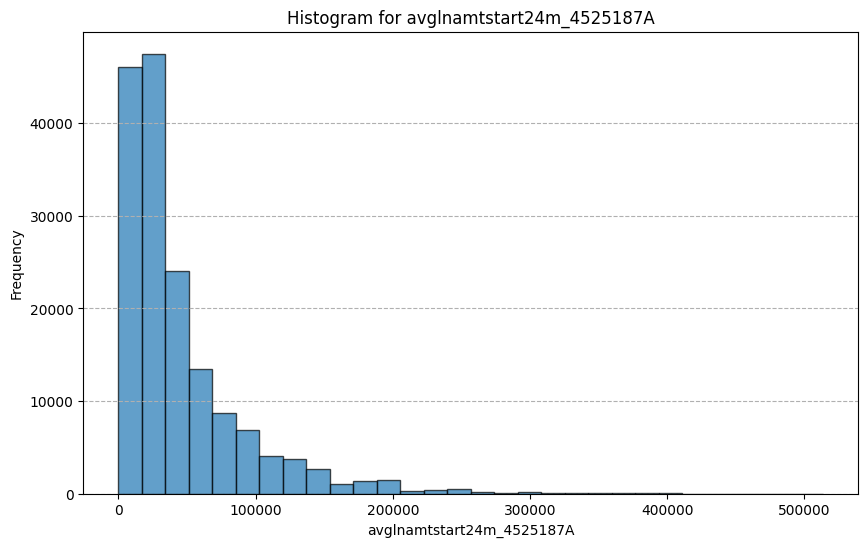

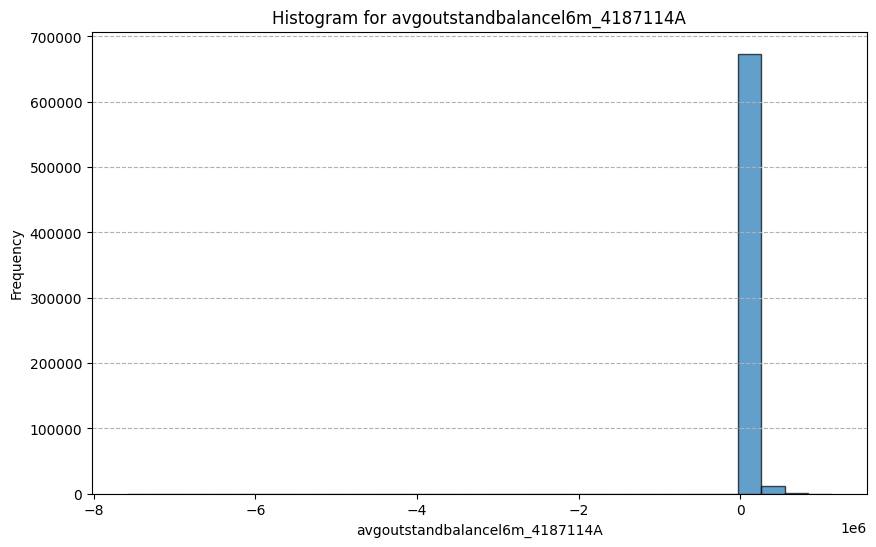

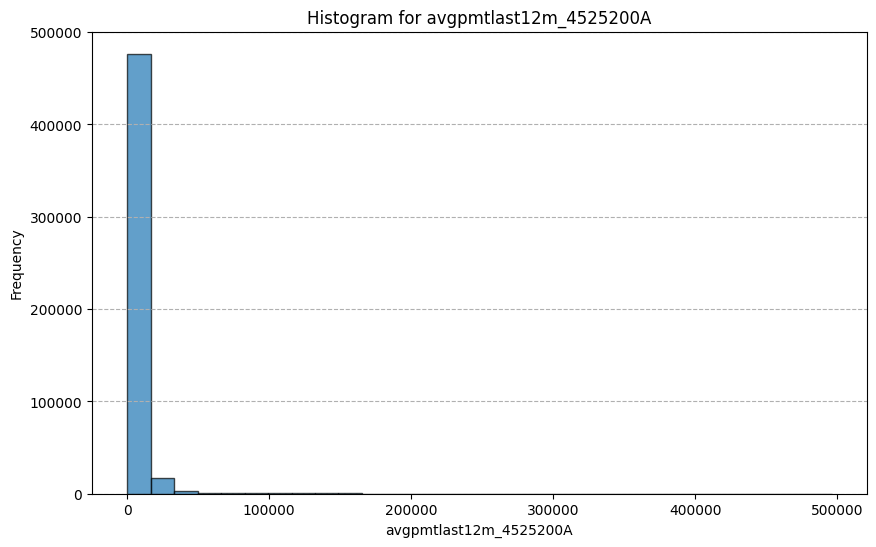

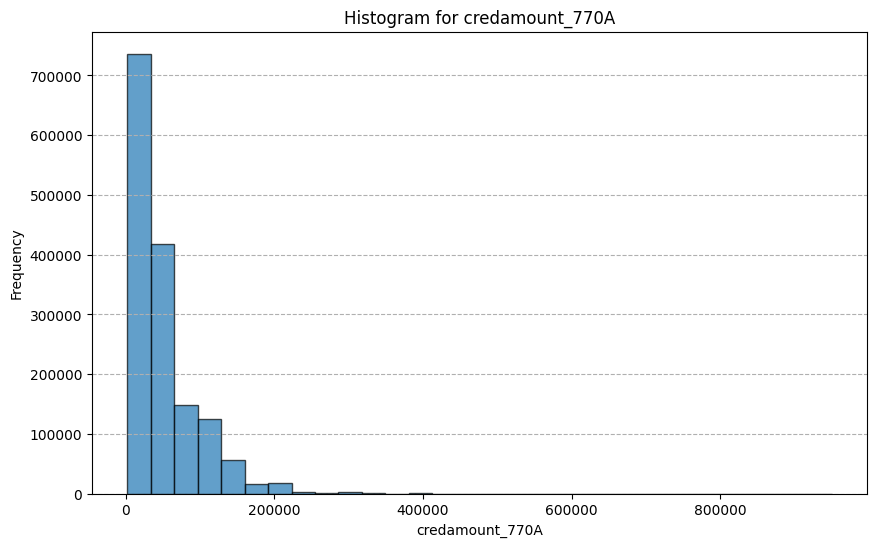

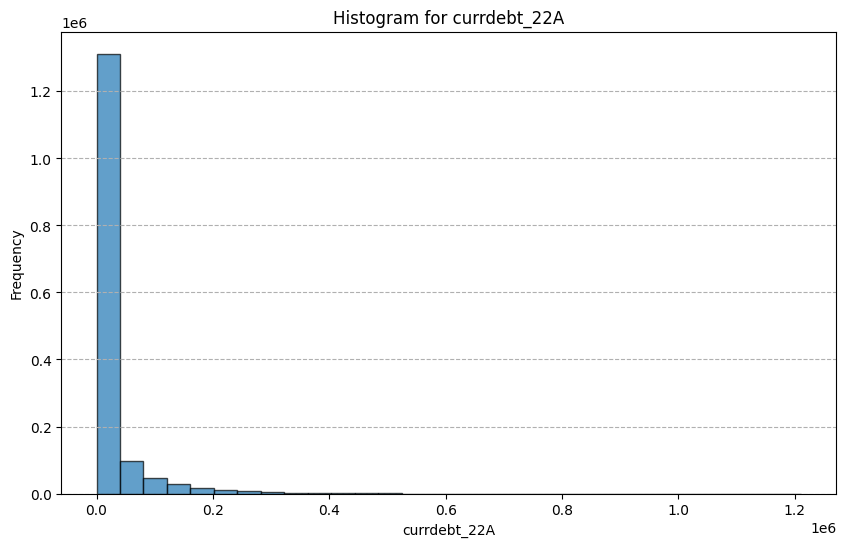

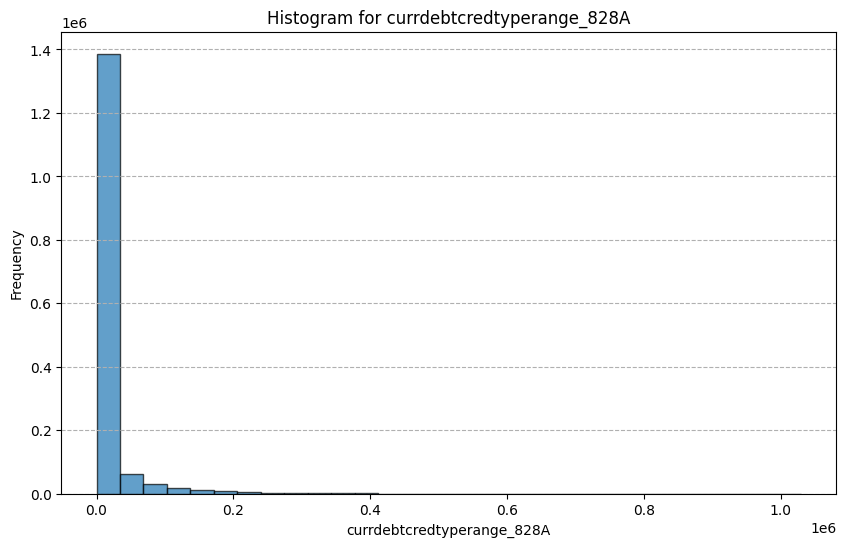

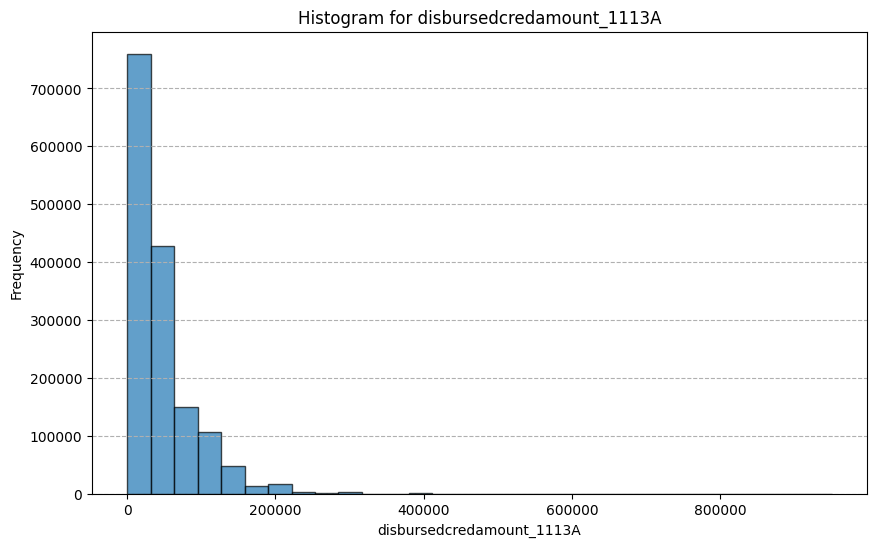

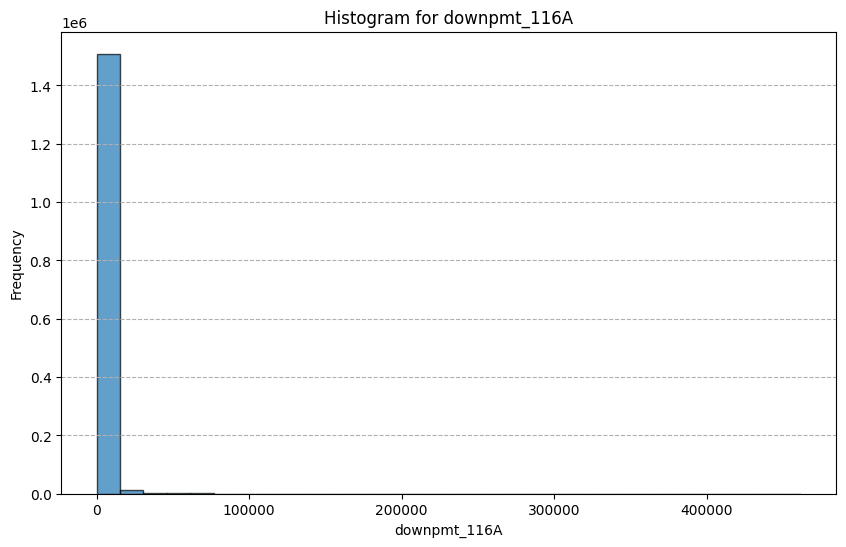

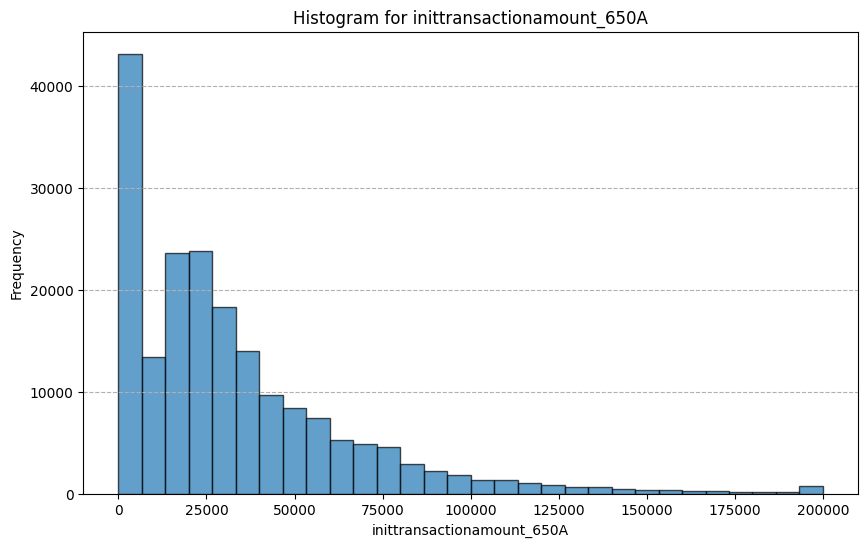

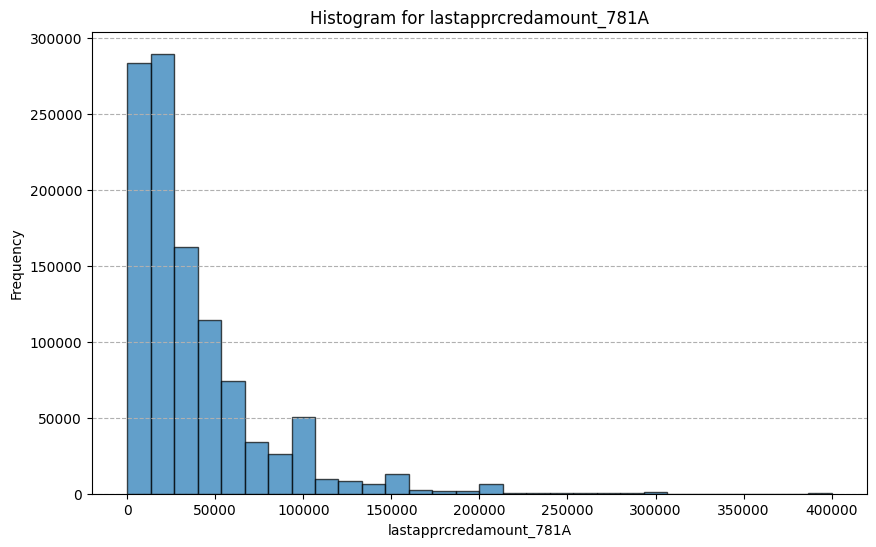

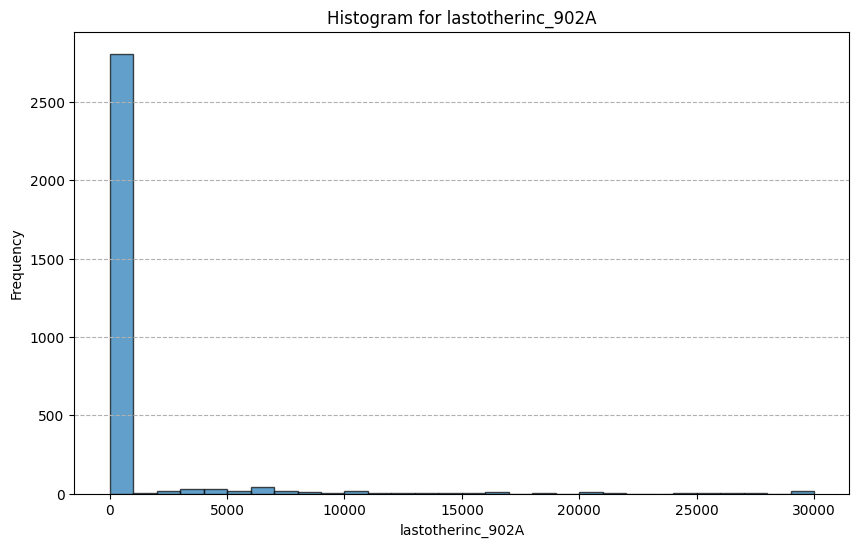

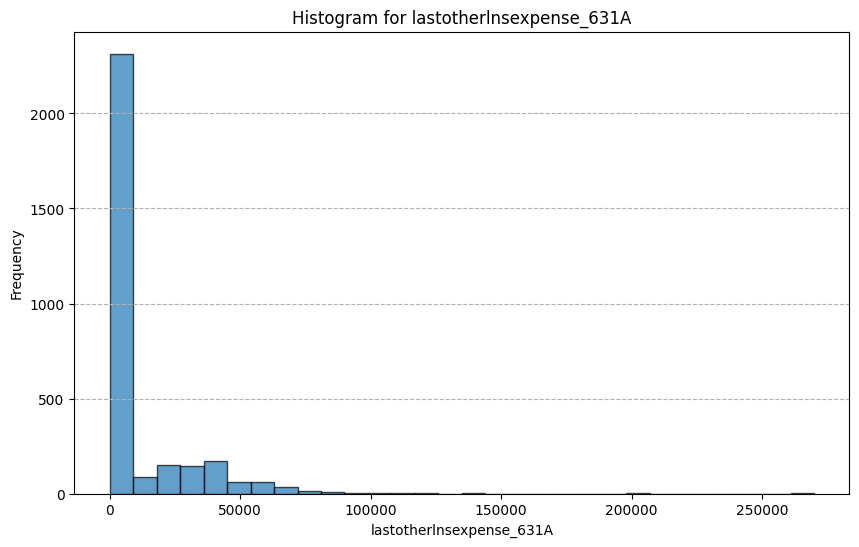

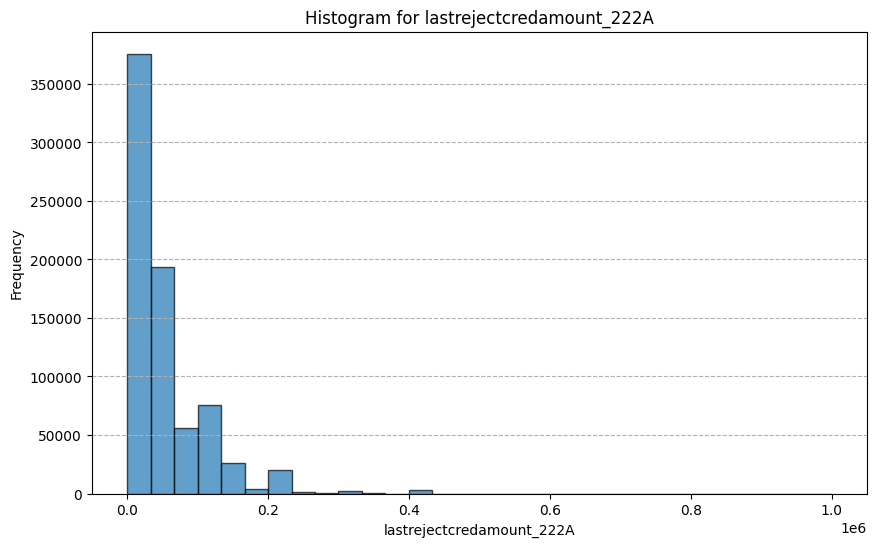

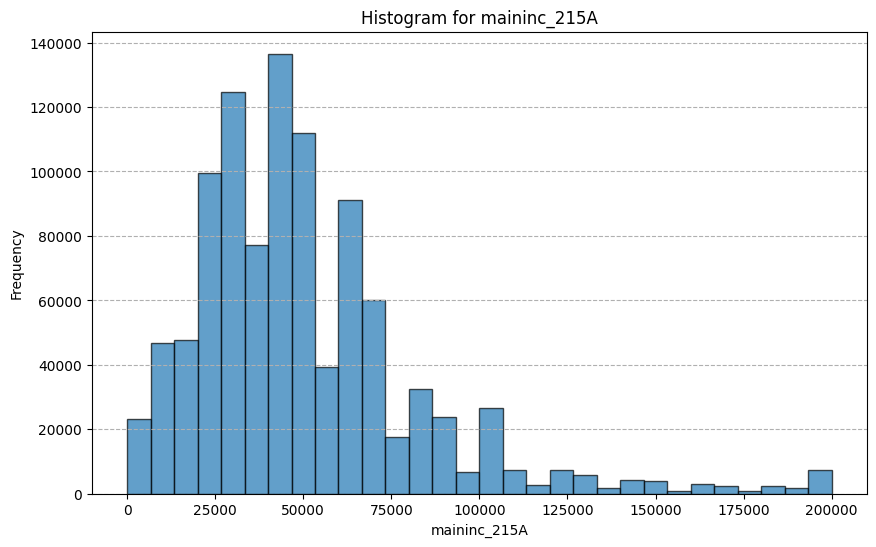

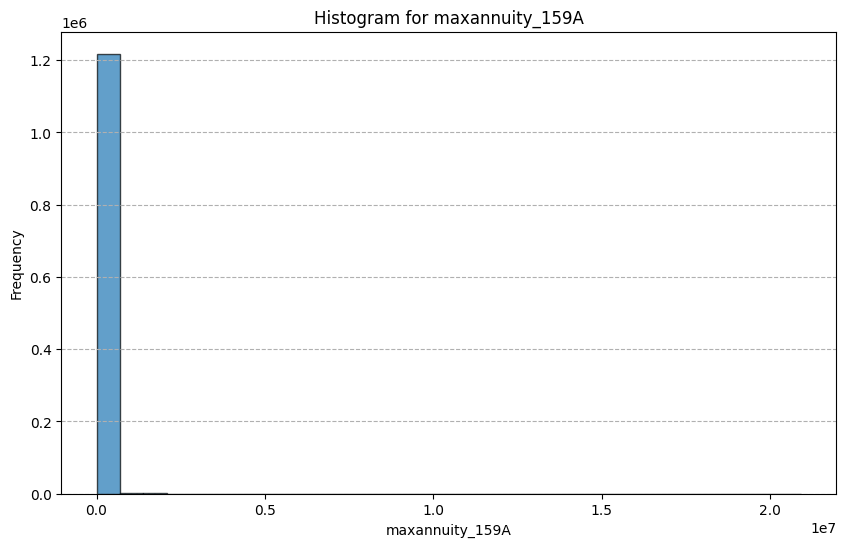

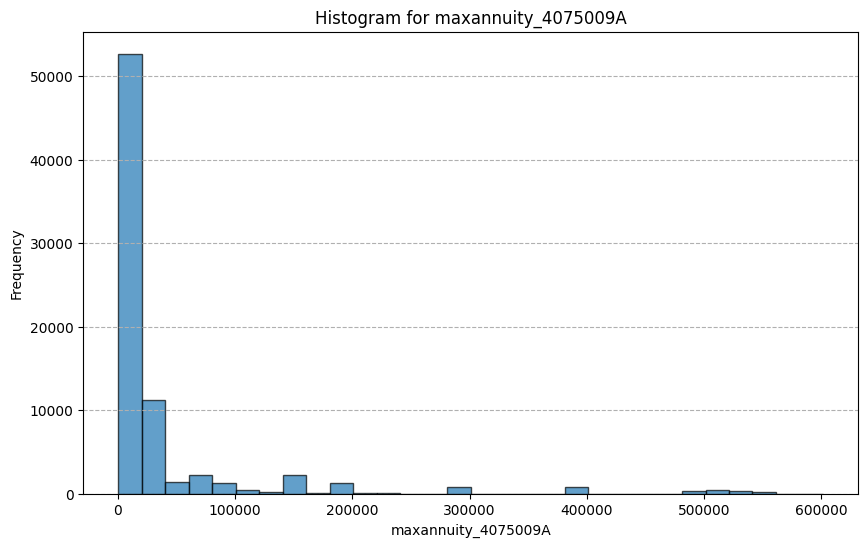

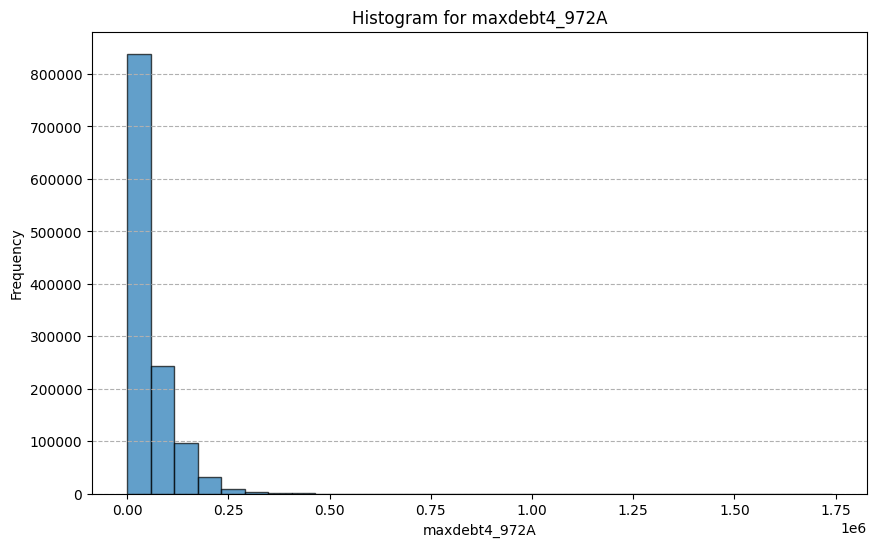

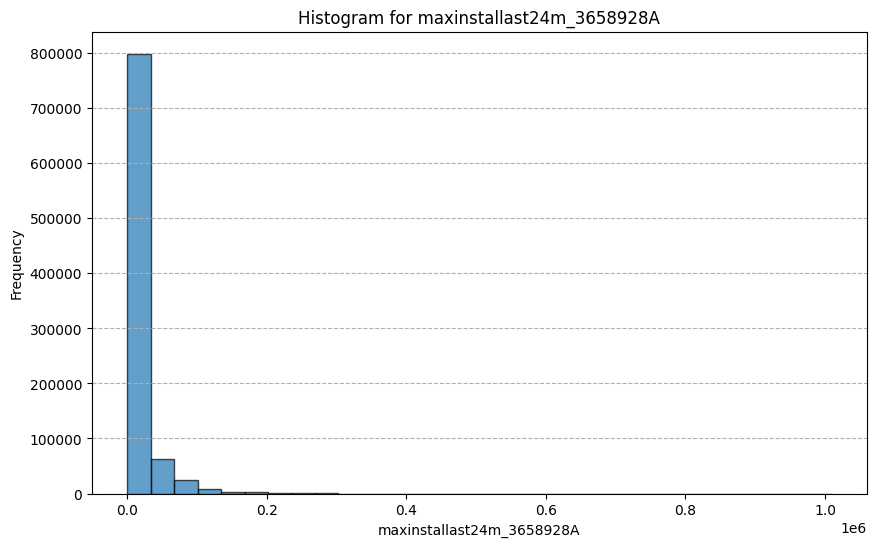

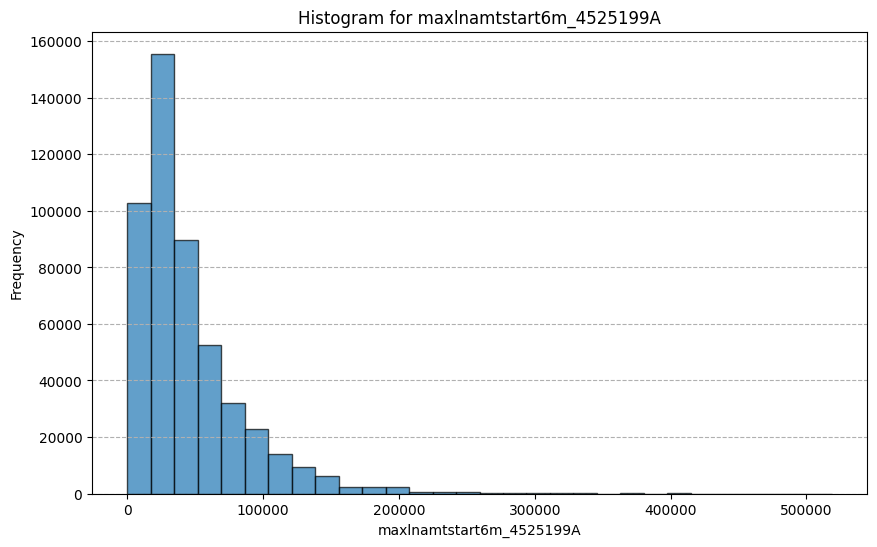

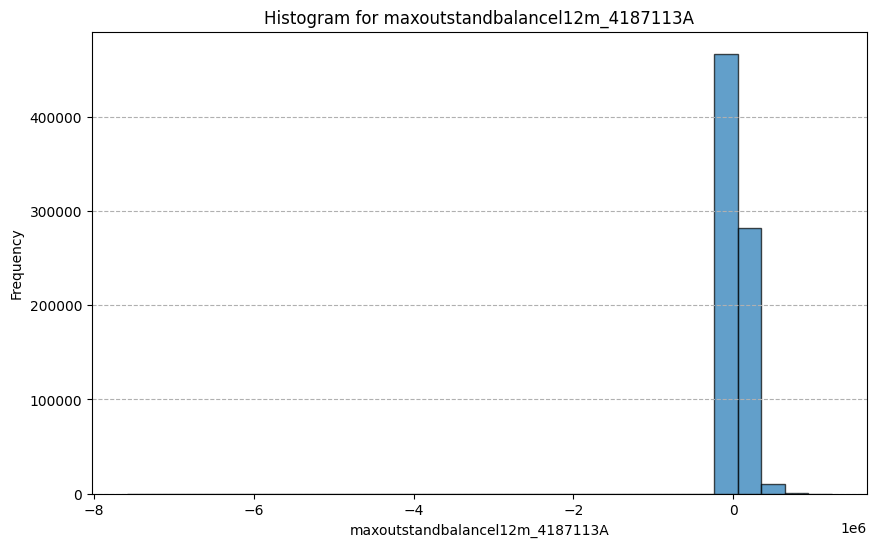

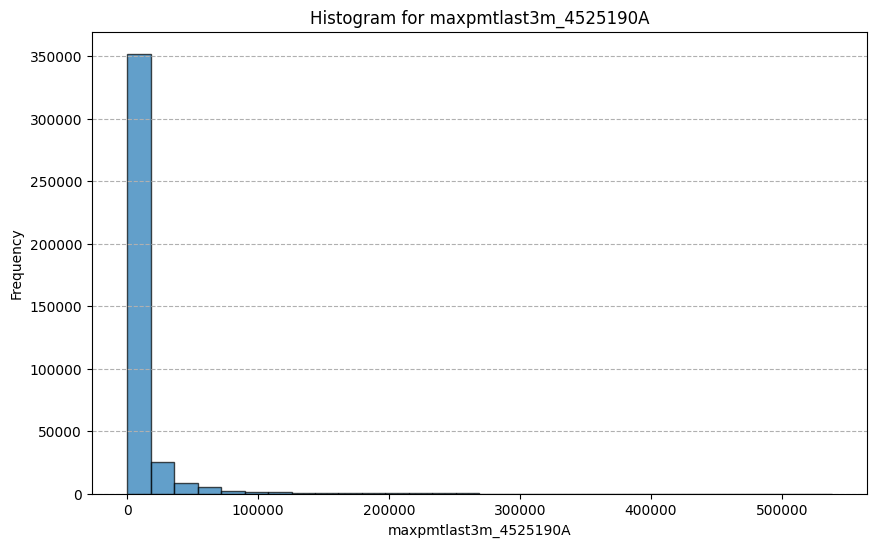

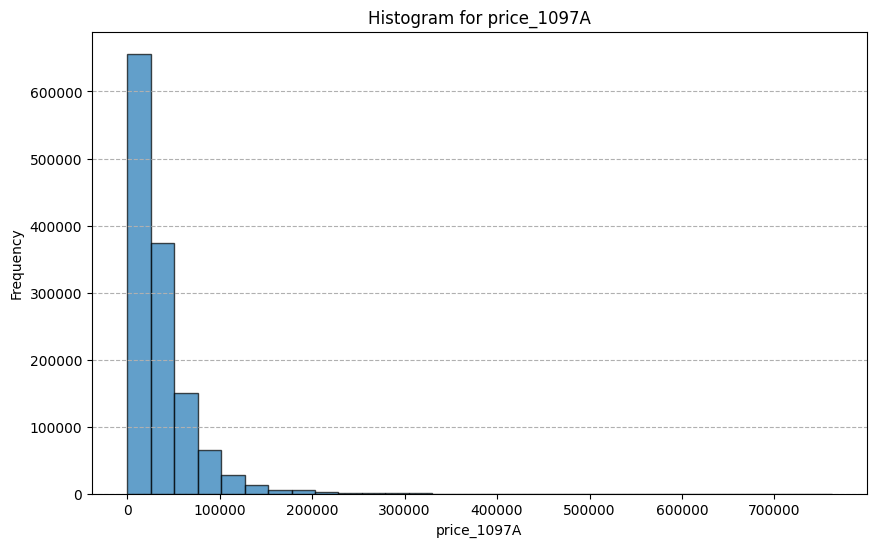

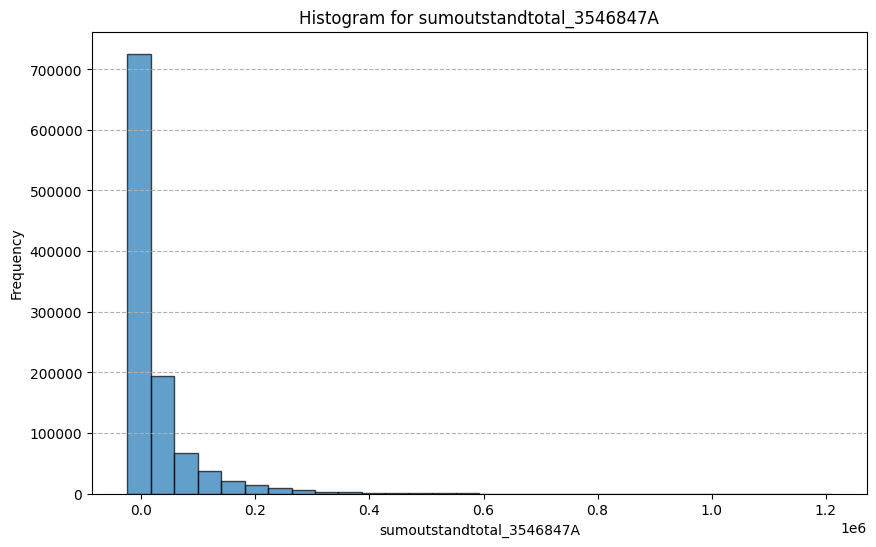

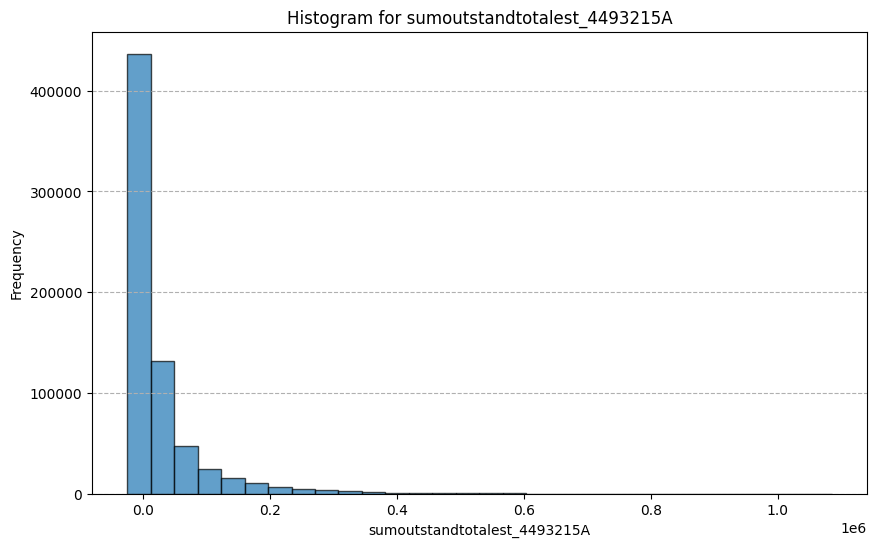

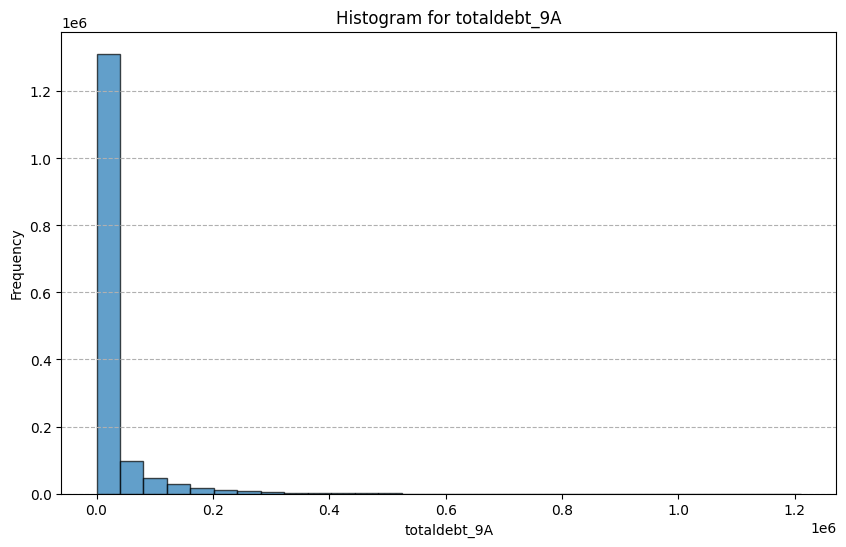

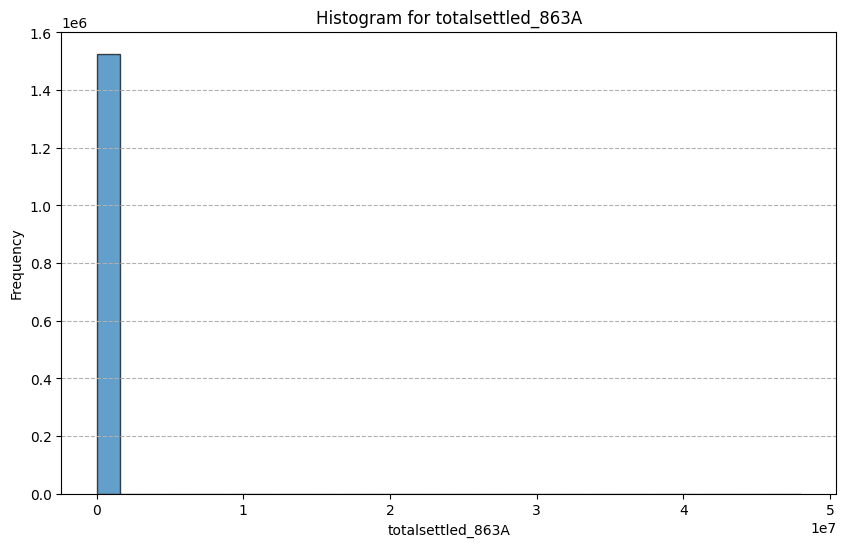

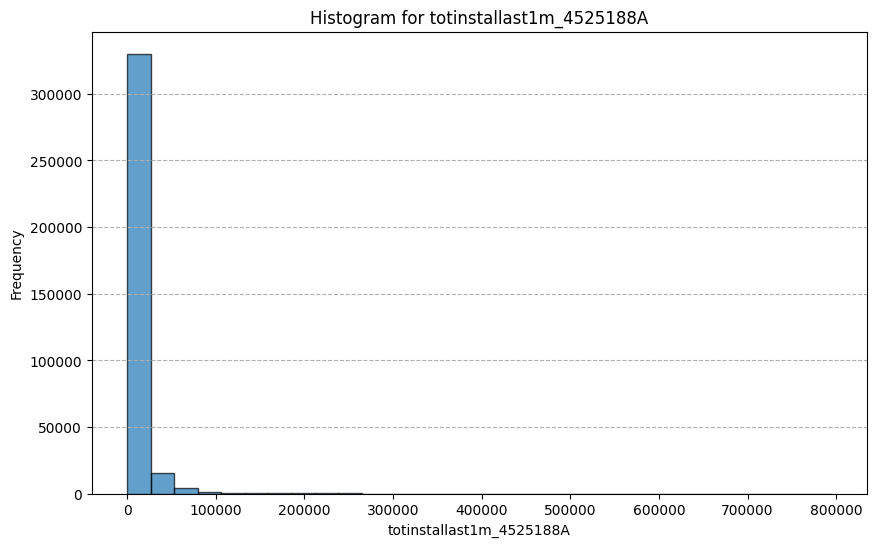

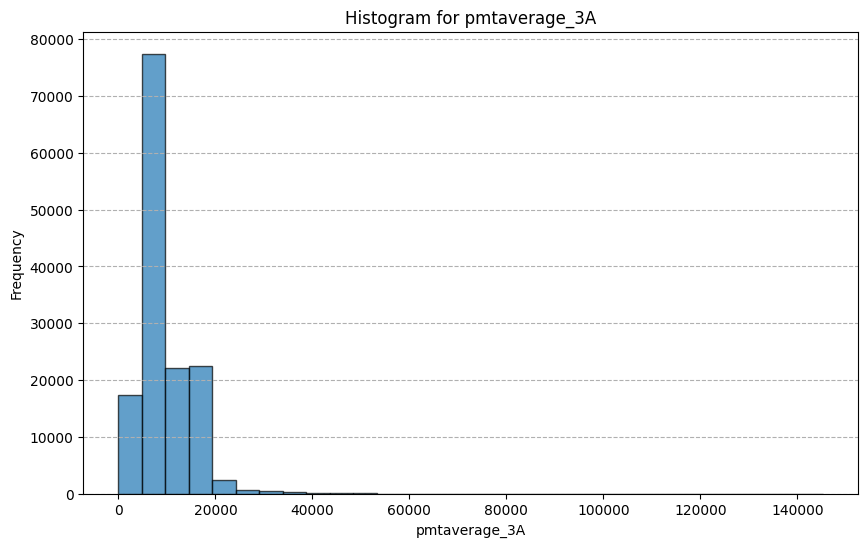

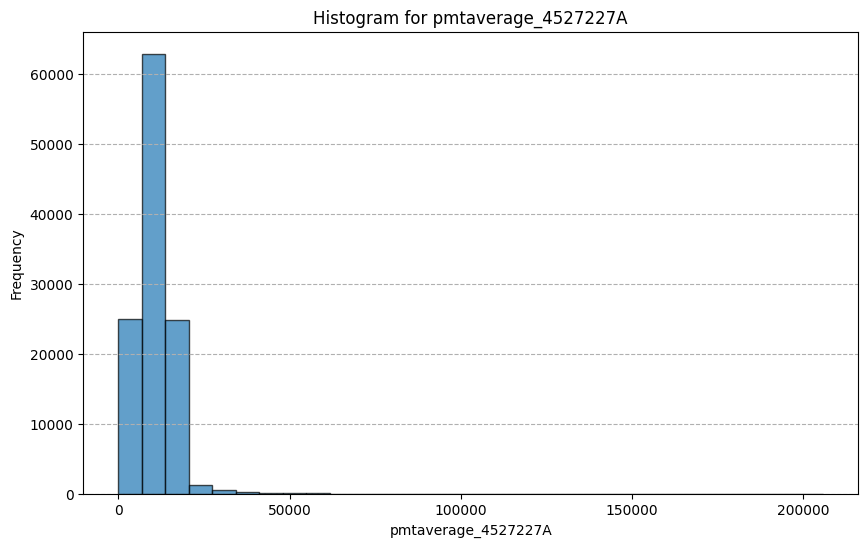

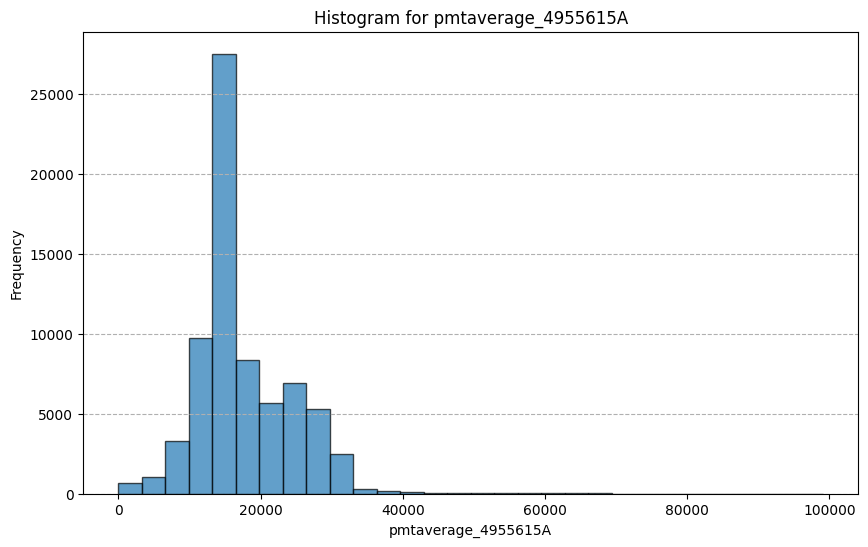

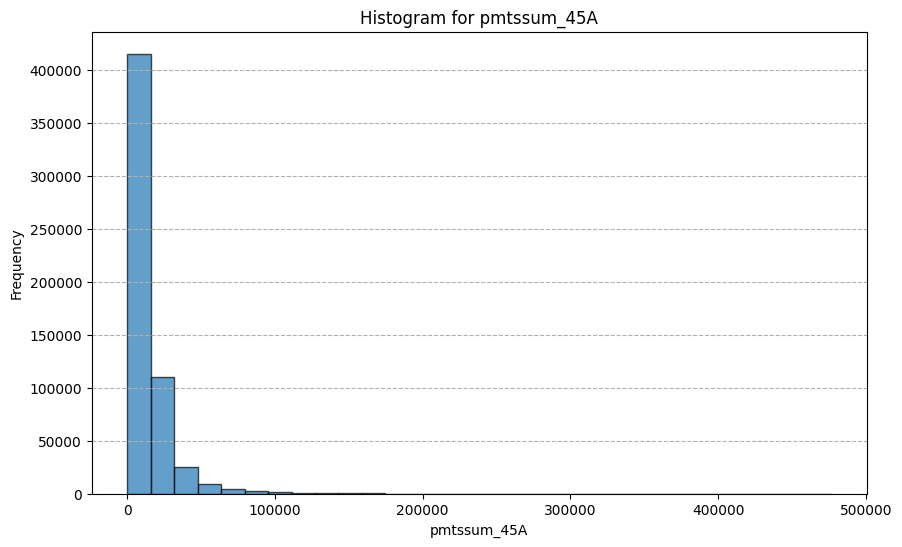

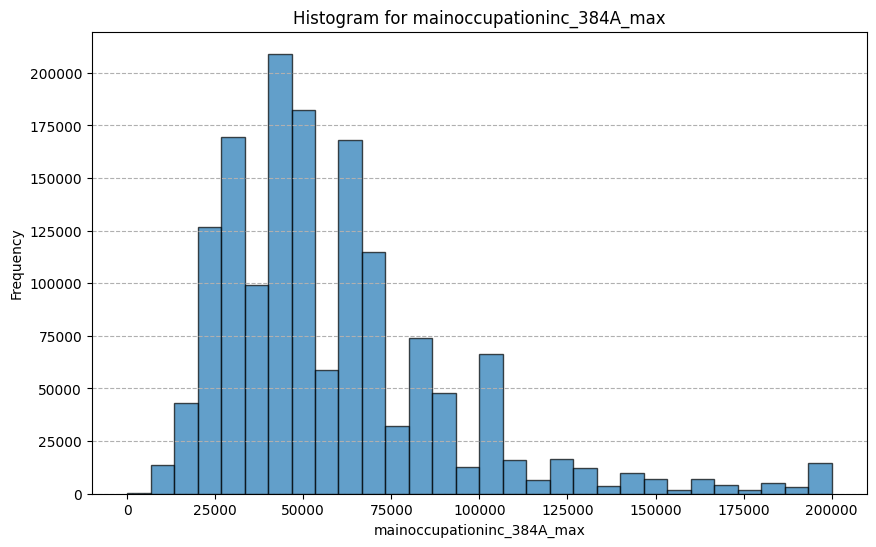

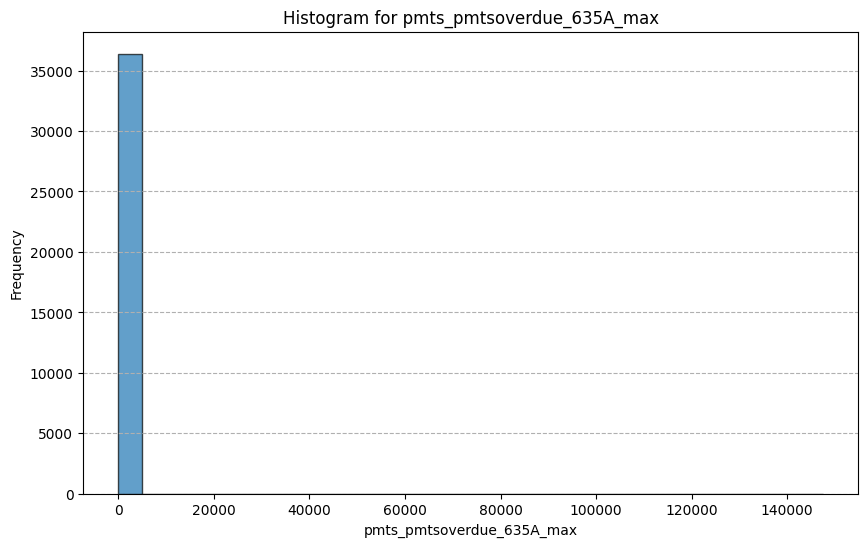

Column: case_id
  Mean: 1286076.571738679
  Median: 1358283.0
  Standard Deviation: 718946.5922850736
  Min: 0
  Max: 2703454

Column: MONTH
  Mean: 201936.28798245057
  Median: 201910.0
  Standard Deviation: 44.73597450310786
  Min: 201901
  Max: 202010

Column: WEEK_NUM
  Mean: 40.76903617638254
  Median: 40.0
  Standard Deviation: 23.79798129273293
  Min: 0
  Max: 91

Column: target
  Mean: 0.03143727577671242
  Median: 0.0
  Standard Deviation: 0.17449639942791664
  Min: 0
  Max: 1

Column: amtinstpaidbefduel24m_4187115A
  Mean: 55958.330288712736
  Median: 29265.201
  Standard Deviation: 71614.16635443608
  Min: 0.0
  Max: 1408010.2

Column: annuity_780A
  Mean: 4039.207272097421
  Median: 3119.8
  Standard Deviation: 3006.6076291543927
  Min: 80.8
  Max: 106007.0

Column: annuitynextmonth_57A
  Mean: 1435.7750149552216
  Median: 0.0
  Standard Deviation: 2807.021231822098
  Min: 0.0
  Max: 87500.0

Column: avginstallast24m_3658937A
  Mean: 5401.5876364690785
  Median: 4039.4001
 

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, mean, stddev, min, max, expr
import matplotlib.pyplot as plt
import pandas as pd

# Initialize a Spark session
spark = SparkSession.builder.appName("BigDataAnalysis").getOrCreate()

# Load the dataset
file_path = "sampled_data.csv"  # Replace with your file path
df = spark.read.csv(file_path, header=True, inferSchema=True)

# Calculate Descriptive Statistics for Numerical Columns
numerical_columns = [c for c, dtype in df.dtypes if dtype in ("int", "double")]

# Create a dictionary to store descriptive statistics
stats_summary = {}
for col_name in numerical_columns:
    # Calculate mean, standard deviation, min, and max
    mean_value = df.select(mean(col(col_name))).collect()[0][0]
    stddev_value = df.select(stddev(col(col_name))).collect()[0][0]
    min_value = df.select(min(col(col_name))).collect()[0][0]
    max_value = df.select(max(col(col_name))).collect()[0][0]
    
    # Calculate median using approxQuantile from DataFrame (not from functions)
    median_value = df.approxQuantile(col_name, [0.5], 0.01)[0]

    # Store statistics in dictionary
    stats_summary[col_name] = {
        "mean": mean_value,
        "stddev": stddev_value,
        "min": min_value,
        "max": max_value,
        "median": median_value
    }

# Convert the summary dictionary to a Pandas DataFrame for easier visualization
stats_df = pd.DataFrame(stats_summary).transpose()
print(stats_df)

# Plot histograms for numerical columns
for col_name in numerical_columns:
    # Convert the column to Pandas for plotting
    pandas_df = df.select(col_name).toPandas().dropna()
    
    # Plot histogram
    plt.figure(figsize=(10, 6))
    plt.hist(pandas_df[col_name], bins=30, edgecolor='k', alpha=0.7)
    plt.title(f"Histogram for {col_name}")
    plt.xlabel(col_name)
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--')
    plt.show()

# Display the calculated statistics for each numerical column
for col_name, stats in stats_summary.items():
    print(f"Column: {col_name}")
    print(f"  Mean: {stats['mean']}")
    print(f"  Median: {stats['median']}")
    print(f"  Standard Deviation: {stats['stddev']}")
    print(f"  Min: {stats['min']}")
    print(f"  Max: {stats['max']}\n")
